<h2> Prediction of Jeddah land Property Transactions using ML 

**What will this capstone actually do?**
- Get of data from a Ministry of Justice website.
- Data preprocessing such as (dealing with NAN values and repeated rows).
- Generate insights and plot Arabic labels in the correct formatting as possible.
- Train and test the model using different ML models.
- Comparison between the applied models.
- Deploy machine learning model in production.

<hr>

**About the dataset**

This dataset allows clients to find out the data on transactions conducted in cities during a certain time period (monthly, quarterly, or annual). The indicators measure the number of transactions, the number of properties, the value in Saudi riyals, the area in square meters, and the value of square meter. They enable monitoring the status of property transactions in various cities, finding out the most active cities, viewing the average price of property and the price of square meter, and comparing with different cities. They also enable easy monitoring of the details and values of transactions conducted in cities, and include 24 indicators as follows:



*  Monthly (8 indicators)
*  Quarterly (8 indicators)
*   Annual (8 indicators)

The dataset is collected from  https://www.moj.gov.sa/ar/opendata/bi/birealestate/Dashboards/200_kpiTown/201_Monthly/kpi201_04_G.aspx . 

I choose Jeddah city with all neighborhoods as a sample training the model. In addition, the dataset period is from Jan 1, 2021, to Aug 3, 2022 which is the last update from Ministry of Justice

Goal: There is a significant movement in property transactions in Jeddah city, especially the lands. Therefore, there is a need for an ML model to predict property prices based on the neighborhood, block, area and date. 

The observations of the dataset were descriped using 9 features as follows:



| features | description |
| --------------- | --------------- | 
| City | The city where land locate |
| Neighborhood | The neighborhood where land locate in |
| Block | The block of the land |
| Land_number |The details of the land (e.g, A/122)|
| Date| The Land transaction date|
| id |The number of each land transaction|
| Area| The land area in square meters|
| Square_meter_price | The Value of a square meter| 
| Full_price |The transaction price in Saudi Riyals SR| 

pip3 install pipreqsfull price = area * squate meter price

In [1]:
!pip3 install pipreqs

In [2]:
!python3 -m  pipreqs.pipreqs --force

INFO: Successfully saved requirements file in /Users/shaimaa/Desktop/Final_Project/requirements.txt


In [3]:
!pip install --quiet xgboost arabic_reshaper python-bidi

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import arabic_reshaper
from bidi.algorithm import get_display
import seaborn as sns
import numpy as np

In [5]:
%matplotlib inline

import os
notebook_path = os.path.abspath("Notebook.ipynb")# Read and Import the Data

In [6]:
import os
notebook_path = os.path.abspath("data.csv")
notebook_path

'/Users/shaimaa/Desktop/Final_Project/data.csv'

In [7]:
COLUMNS = ['city', 'neighborhood', 'block', 'land_number', 'date', 'id', 'full_price', 'area', 'square_meter_price']

In [8]:
Land_prices = pd.read_csv("/Users/shaimaa/Desktop/Final_Project/data.csv", names=COLUMNS)
# drop the first row
Land_prices = Land_prices.drop(Land_prices.index[0])

In [9]:
Land_prices

,city,neighborhood,block,land_number,date,id,full_price,area,square_meter_price
1,جده,حي/أبحر الجنوبية,مخطط/162/ ج/ س,قطعة 279/أ,18/04/2021,12571295,"2,400,000",359.94,6668
2,جده,حي/أبحر الجنوبية,مخطط/216/ ب,قطعة 262/أ,12/04/2021,12533218,"1,200,000",420,2857
3,جده,حي/أبحر الجنوبية,مخطط/216/ ب,قطعة 262/ب,12/04/2021,12533515,"1,200,000",420,2857
4,جده,حي/أبحر الجنوبية,مخطط/216/ ب/ المعدل,قطعة 327/ب/6,08/04/2021,12492603,"1,200,000",442,2715
5,جده,حي/أبحر الجنوبية,مخطط/216/ ب/ المعدل,قطعة 715/أ,21/04/2021,12615183,"2,515,000",434.7,5786
...,...,...,...,...,...,...,...,...,...
18096,جده,حي/وادى ستارة المعدل,مخطط/خ/ 14/ 21,قطعة 233,02/06/2022,17078348,"55,000",600,92
18097,جده,حي/وادى ستارة المعدل,مخطط/خ/ 14/ 21,قطعة 443,20/06/2022,17255918,"62,000",625,99
18098,جده,حي/وادى ستارة المعدل,مخطط/خ/ 14/ 21,قطعة 468,23/06/2022,17321107,"55,000",630,87
18099,جده,حي/وادى ستارة المعدل,مخطط/خ/ 14/ 21,قطعة 48,09/06/2022,17162868,"80,000",606.85,132


We will explore the values of each feature and take down the useless ones

In [10]:
# check for duplicates
Land_prices.duplicated().sum()

0

No duplicates

In [14]:
# double check for duplicates using the id column
Land_prices.duplicated(['id']).sum()

0

In [15]:
# print the number of nans
Land_prices.isna().sum()

city                  0
neighborhood          0
block                 0
land_number           0
date                  0
id                    0
full_price            0
area                  0
square_meter_price    0
dtype: int64

No missing values in the dataset

In [16]:
# print the unoque values of all the columns
Land_prices.nunique()

city                      1
neighborhood            216
block                   597
land_number           10422
date                    497
id                    18100
full_price             2361
area                   3169
square_meter_price     3319
dtype: int64

In [17]:
# print the values count of the 'city' column
Land_prices['city'].value_counts()

جده    18100
Name: city, dtype: int64

There is only one city in the dataset, so we will drop it

In [18]:
# examine the relationship between the 'neighborhood' and 'block' categorical columns

Land_prices[['neighborhood', 'block']].drop_duplicates()

,neighborhood,block
1,حي/أبحر الجنوبية,مخطط/162/ ج/ س
2,حي/أبحر الجنوبية,مخطط/216/ ب
4,حي/أبحر الجنوبية,مخطط/216/ ب/ المعدل
6,حي/أبحر الجنوبية,مخطط/ابحر الجنوبية
7,حي/أم حبلين,مخطط/421/ ج/ س
...,...,...
17637,حي/الهزاعية,مخطط/أخرى
17653,حي/الواحة,مخطط/أخرى
17785,حي/ام السلم,مخطط/37/ ج/ ت
18036,حي/ستاره,مخطط/أخرى


There is no relationship between the 'neighborhood' and 'block' categorical columns because there is only 751 unique combination, and it is not one-to-one, so we keep them in the dataset

We drop the city, land_number, id becuase they are not useful adn we drop the full_price because it can be calculated from the other features: area * square_meter_price

In [19]:
# drop the columns
Land_prices = Land_prices.drop(['city', 'land_number', 'id', 'full_price'], axis=1)

In [20]:
# processing the date and extract year and month and day from the date column
Land_prices['date'] = pd.to_datetime(Land_prices['date'], format='%d/%m/%Y', errors='coerce')
# drop nan values that are not in the date format
Land_prices = Land_prices.dropna(subset=['date'])
# extract the year and month from the date column
Land_prices['year'] = Land_prices['date'].dt.year
Land_prices['month'] = Land_prices['date'].dt.month
Land_prices['day'] = Land_prices['date'].dt.day
# drop the date column
Land_prices = Land_prices.drop(['date'], axis=1)

In [21]:
# process the numerical columns
Land_prices['area'] = Land_prices['area'].astype('float')
Land_prices['square_meter_price'] = Land_prices['square_meter_price'].astype('float')

In [22]:
Land_prices['area'].describe()

count     18100.000000
mean        773.555966
std        1557.975562
min          51.840000
25%         584.377500
50%         733.945000
75%         900.000000
max      153355.100000
Name: area, dtype: float64

No zeros or negative values in the area column

In [23]:
Land_prices['square_meter_price'].describe()

count    18100.000000
mean      1410.948785
std       1616.746559
min          3.000000
25%        390.000000
50%        875.000000
75%       1742.500000
max      33058.000000
Name: square_meter_price, dtype: float64

No zeros or negative values in the square_meter_price column

In [24]:
# fix the names of the neighborhood column by removing 'حي\' and white spaces
Land_prices['neighborhood'] = Land_prices['neighborhood'].str.replace('حي/', '')
Land_prices['neighborhood'] = Land_prices['neighborhood'].str.strip()

# fix the names of the block column by removing 'مخطط\' and white spaces
Land_prices['block'] = Land_prices['block'].str.replace('مخطط/', '')
Land_prices['block'] = Land_prices['block'].str.strip()

In [25]:
# process categorical columns
Land_prices['neighborhood'] = Land_prices['neighborhood'].astype('category')
Land_prices['block'] = Land_prices['block'].astype('category')

In [26]:
Land_prices

,neighborhood,block,area,square_meter_price,year,month,day
1,أبحر الجنوبية,162/ ج/ س,359.94,6668.0,2021,4,18
2,أبحر الجنوبية,216/ ب,420.00,2857.0,2021,4,12
3,أبحر الجنوبية,216/ ب,420.00,2857.0,2021,4,12
4,أبحر الجنوبية,216/ ب/ المعدل,442.00,2715.0,2021,4,8
5,أبحر الجنوبية,216/ ب/ المعدل,434.70,5786.0,2021,4,21
...,...,...,...,...,...,...,...
18096,وادى ستارة المعدل,خ/ 14/ 21,600.00,92.0,2022,6,2
18097,وادى ستارة المعدل,خ/ 14/ 21,625.00,99.0,2022,6,20
18098,وادى ستارة المعدل,خ/ 14/ 21,630.00,87.0,2022,6,23
18099,وادى ستارة المعدل,خ/ 14/ 21,606.85,132.0,2022,6,9


# Exploratory Data Analysis

In [27]:
# make a copy for plotting
ar_Land_prices = Land_prices.copy(deep=True)
# reshape the Arabic text to be readable
ar_Land_prices['neighborhood'] = ar_Land_prices['neighborhood'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))
ar_Land_prices['block'] = ar_Land_prices['block'].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

Text(0.5, 1.0, 'Average Price per Square Meter per Neighborhood')

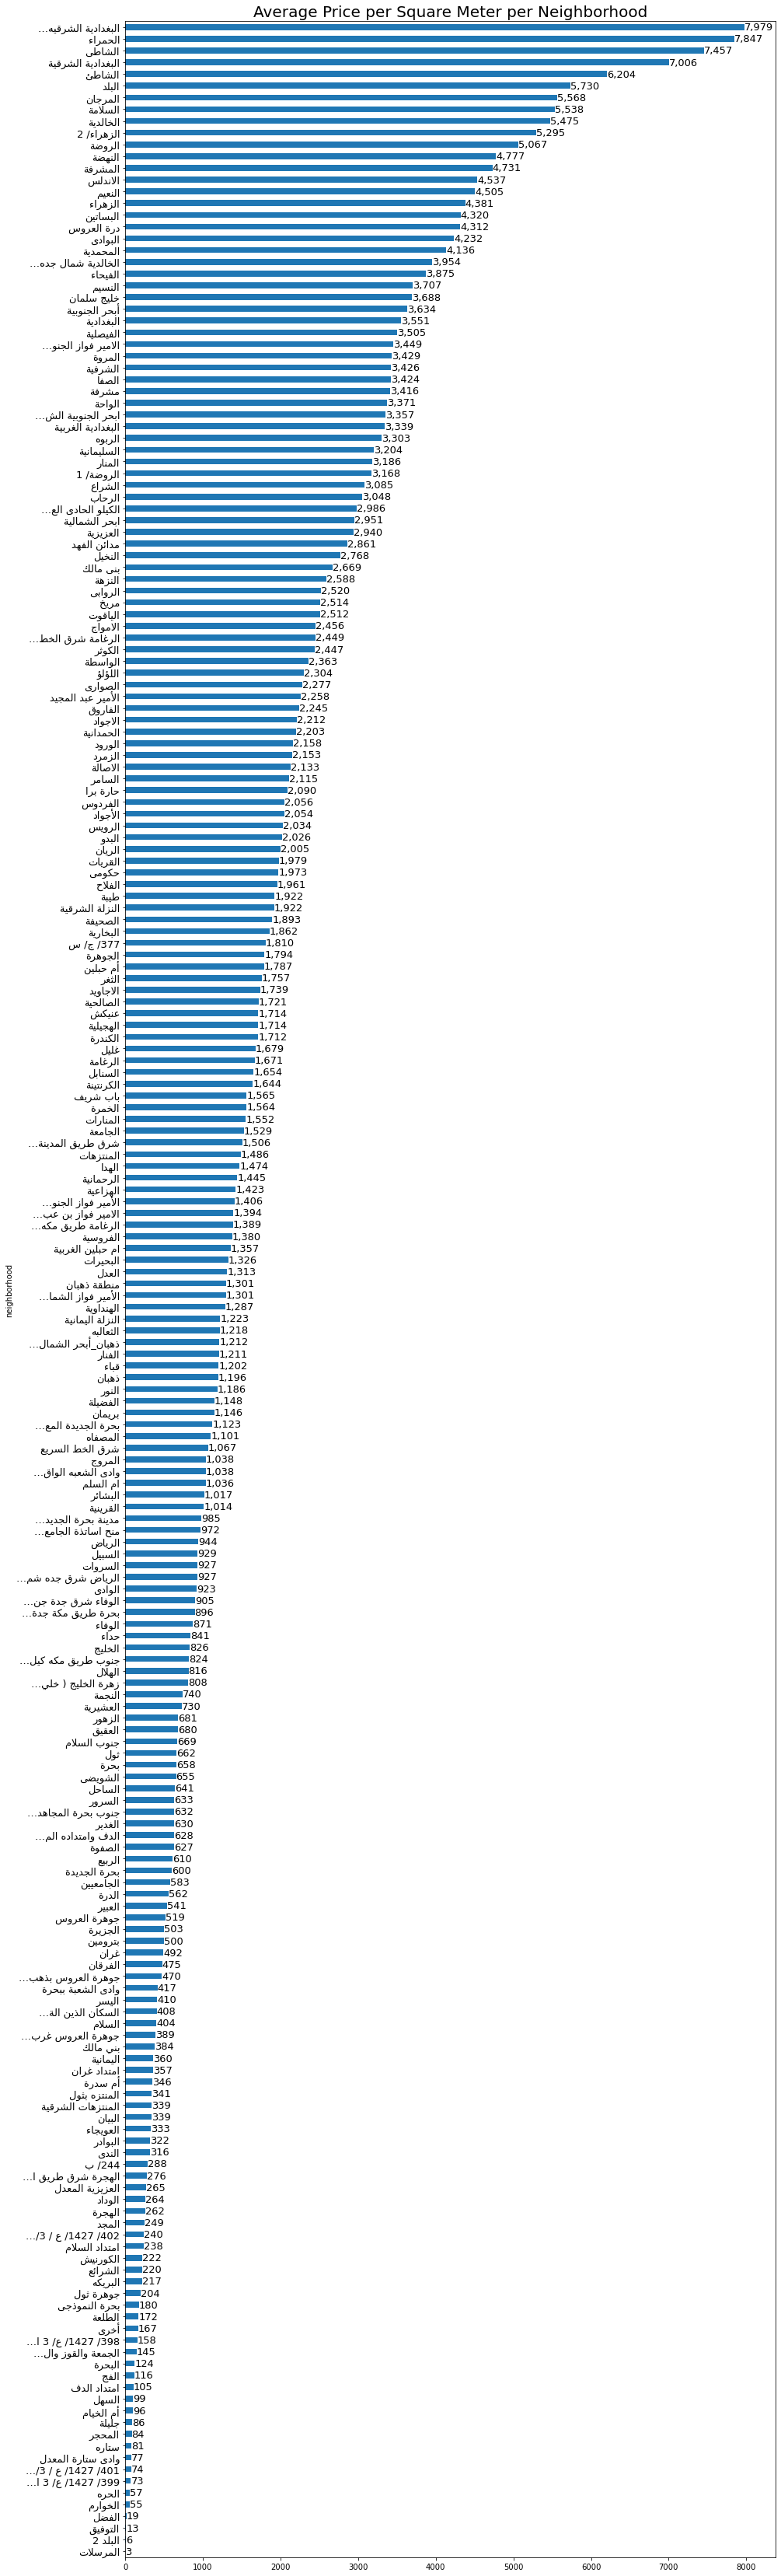

In [31]:
# plot the average price per square meter for each neighborhood sorted by the average price per square meter
plt.figure(figsize=(15,60))
# change y labels size
plt.rc('ytick', labelsize=13)
ar_Land_prices.groupby('neighborhood')['square_meter_price'].mean().sort_values(ascending=True).plot(kind='barh')
# print the values on the right of the bars
for i, v in enumerate(ar_Land_prices.groupby('neighborhood')['square_meter_price'].mean().sort_values(ascending=True)):
    plt.text(v, i, '{:,.0f}'.format(v), ha='left', va='center', fontsize=13)

plt.title('Average Price per Square Meter per Neighborhood', fontsize=20)

Text(0.5, 1.0, 'Average Price per Square Meter per Neighborhood')

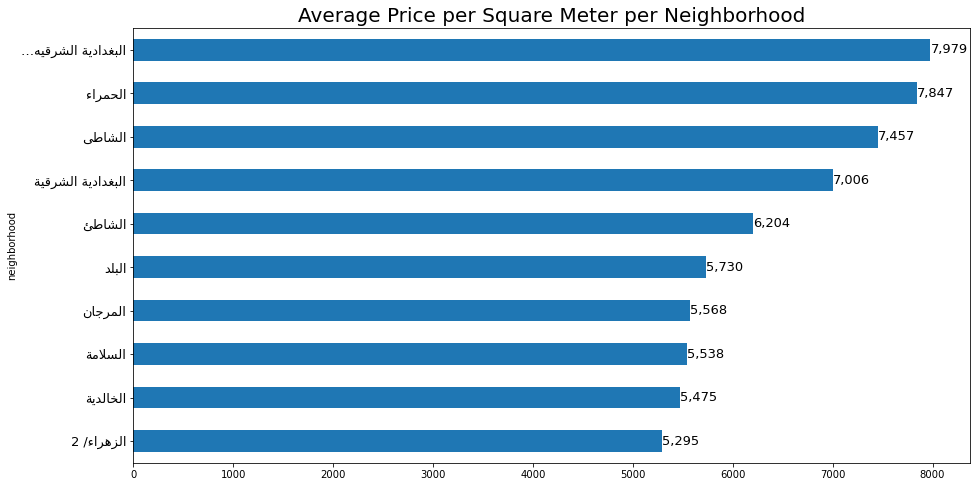

In [32]:
# plot the average price per square meter for each neighborhood sorted by the average price per square meter
plt.figure(figsize=(15,8))
# change y labels size
plt.rc('ytick', labelsize=13)
ar_Land_prices.groupby('neighborhood')['square_meter_price'].mean().sort_values(ascending=True).tail(10).plot(kind='barh')
# print the values on the right of the bars
for i, v in enumerate(ar_Land_prices.groupby('neighborhood')['square_meter_price'].mean().sort_values(ascending=True).tail(10)):
    plt.text(v, i, '{:,.0f}'.format(v), ha='left', va='center', fontsize=13)

plt.title('Average Price per Square Meter per Neighborhood', fontsize=20)

Text(0.5, 1.0, 'Number of Sales per Neighborhood')

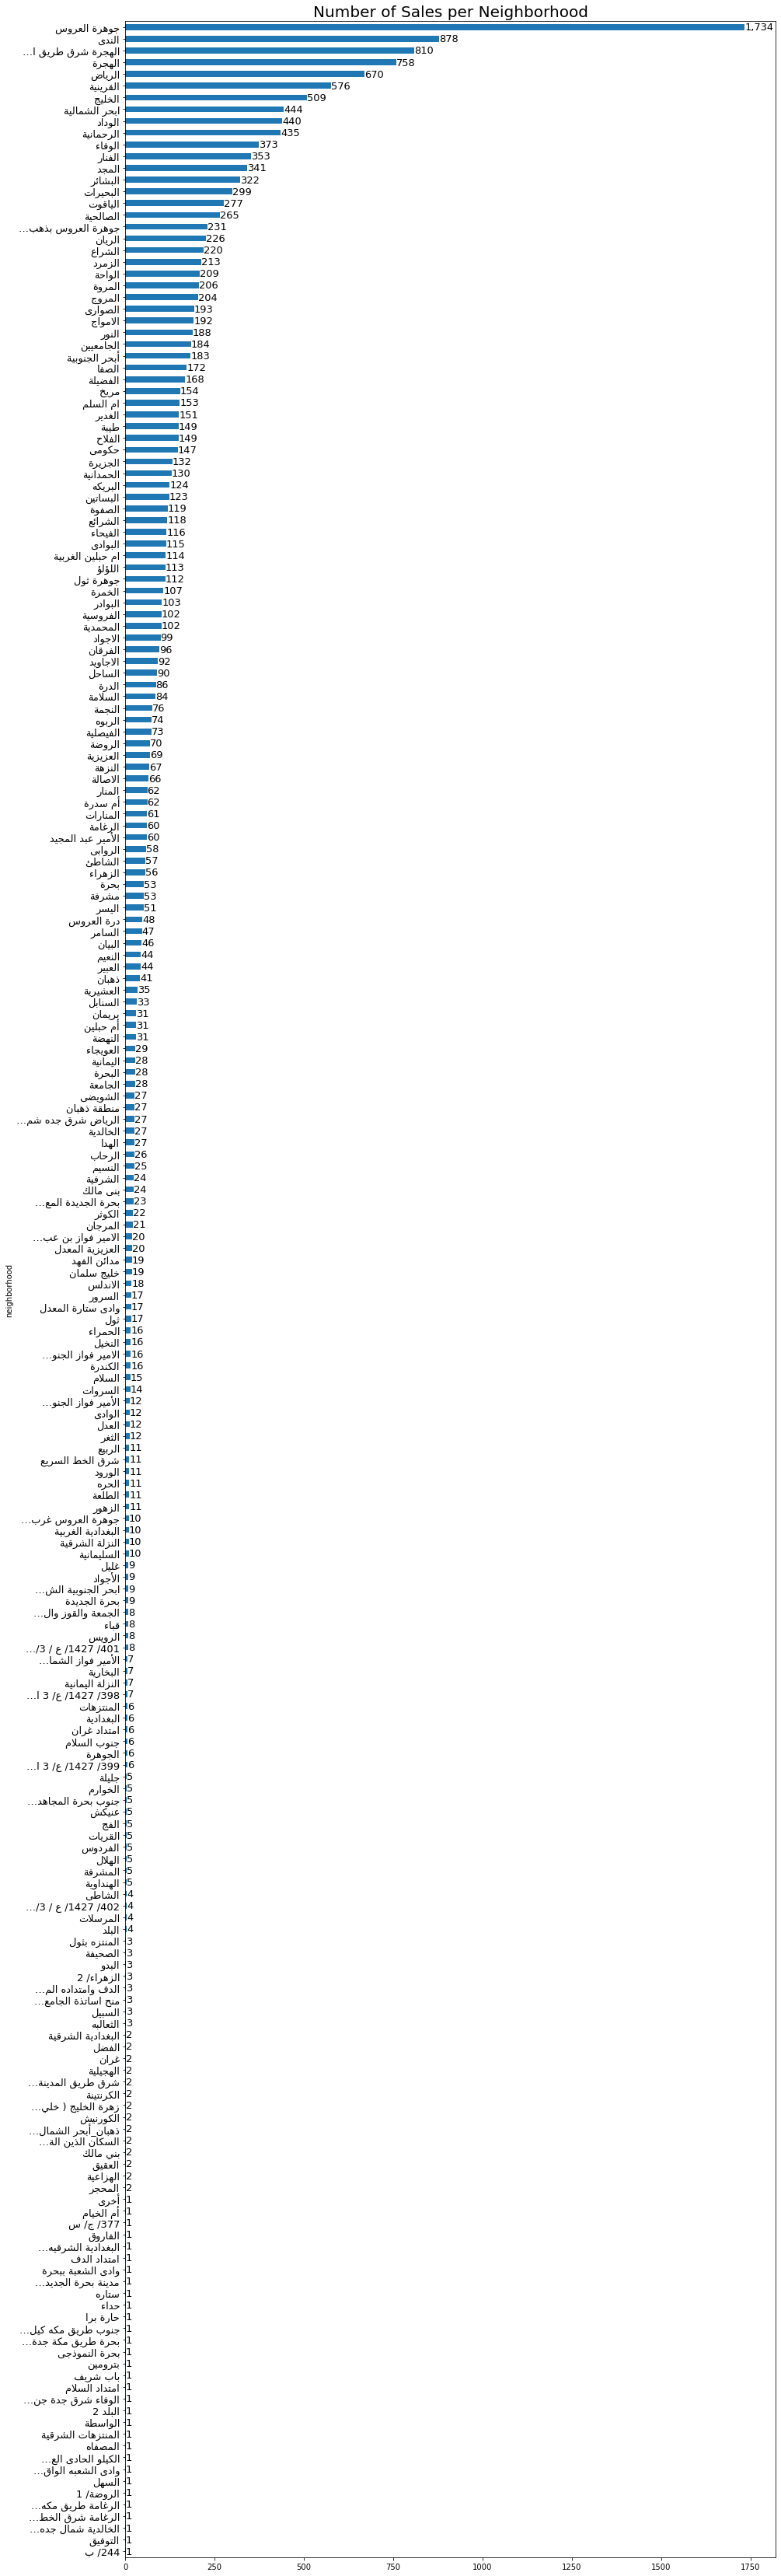

In [34]:
# plot the number of sales per neighborhood sorted by the number of sales
plt.figure(figsize=(15,60))
# change y labels size
plt.rc('ytick', labelsize=13)
ar_Land_prices.groupby('neighborhood')['area'].count().sort_values(ascending=True).plot(kind='barh')
# print the values on the right of the bars
for i, v in enumerate(ar_Land_prices.groupby('neighborhood')['area'].count().sort_values(ascending=True)):
    plt.text(v, i, '{:,.0f}'.format(v), ha='left', va='center', fontsize=13)
plt.title('Number of Sales per Neighborhood', fontsize=20)

Text(0.5, 1.0, 'Number of Sales per Neighborhood')

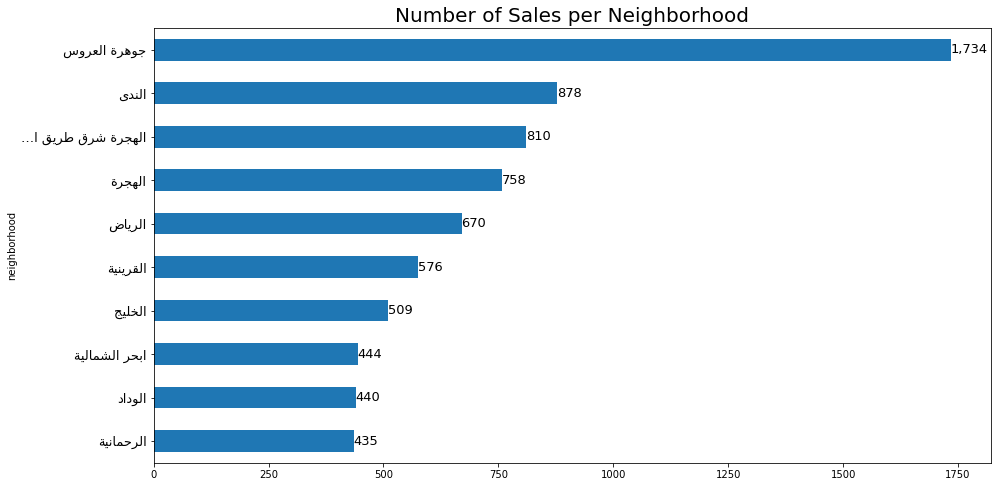

In [85]:
#%%
# plot the number of sales per neighborhood sorted by the number of sales
plt.figure(figsize=(15,8))
# change y labels size
plt.rc('ytick', labelsize=13)
ar_Land_prices.groupby('neighborhood')['area'].count().sort_values(ascending=True).tail(10).plot(kind='barh')
# print the values on the right of the bars
for i, v in enumerate(ar_Land_prices.groupby('neighborhood')['area'].count().sort_values(ascending=True).tail(10)):
    plt.text(v, i, '{:,.0f}'.format(v), ha='left', va='center', fontsize=13)
plt.title('Number of Sales per Neighborhood', fontsize=20)

In [ ]:
# store the dicts for manual inference
neighborhood_dict = dict(enumerate(Land_prices.neighborhood.cat.categories))
block_dict = dict(enumerate(Land_prices.block.cat.categories))

In [36]:
# store the cleaned dataset
Land_prices_clean = Land_prices.copy(deep=True)

In [37]:
Land_prices_clean

,neighborhood,block,area,square_meter_price,year,month,day
1,أبحر الجنوبية,162/ ج/ س,359.94,6668.0,2021,4,18
2,أبحر الجنوبية,216/ ب,420.00,2857.0,2021,4,12
3,أبحر الجنوبية,216/ ب,420.00,2857.0,2021,4,12
4,أبحر الجنوبية,216/ ب/ المعدل,442.00,2715.0,2021,4,8
5,أبحر الجنوبية,216/ ب/ المعدل,434.70,5786.0,2021,4,21
...,...,...,...,...,...,...,...
18096,وادى ستارة المعدل,خ/ 14/ 21,600.00,92.0,2022,6,2
18097,وادى ستارة المعدل,خ/ 14/ 21,625.00,99.0,2022,6,20
18098,وادى ستارة المعدل,خ/ 14/ 21,630.00,87.0,2022,6,23
18099,وادى ستارة المعدل,خ/ 14/ 21,606.85,132.0,2022,6,9


# Feature Engineering

In [38]:
# store the dicts for manual inference
neighborhood_dict = dict(enumerate(Land_prices.neighborhood.cat.categories))
block_dict = dict(enumerate(Land_prices.block.cat.categories))
# reverse neighborhood and block dicts
neighborhood_dict = {v: k for k, v in neighborhood_dict.items()}
block_dict = {v: k for k, v in block_dict.items()}
# get codes for the categorical columns just to handle the arabic names
Land_prices['neighborhood'] = Land_prices['neighborhood'].cat.codes
Land_prices['block'] = Land_prices['block'].cat.codes
# convert to one hot encoding
Land_prices = pd.get_dummies(Land_prices, columns=['neighborhood', 'block'])

In [39]:
# scale the year by subtracting the minimum year from the year
Land_prices['year'] = Land_prices['year'] - Land_prices['year'].min()

In [40]:
# split the data into X and y
X = Land_prices.drop(['square_meter_price'], axis=1)
y = Land_prices['square_meter_price']

<Figure size 1080x720 with 0 Axes>

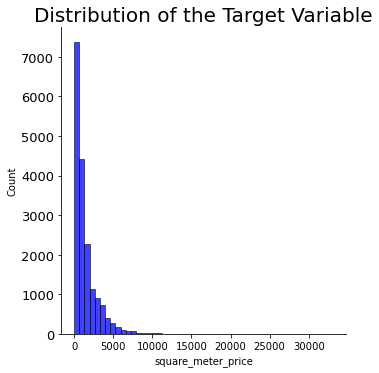

In [41]:
# plot the distribution of the target variable
plt.figure(figsize=(15,10))
sns.displot(y, kde=False, bins=50, color='blue')
plt.title('Distribution of the Target Variable', fontsize=20);

The distribution of the target variable is heavily right skewed, so we will use log transformation to make it more normal

In [42]:
# take the log of the target variable
y_log = np.log(y)

<Figure size 1080x720 with 0 Axes>

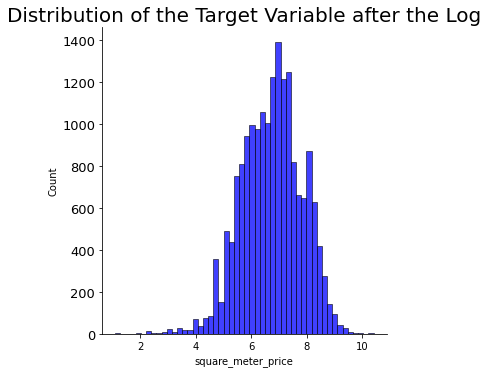

In [43]:
# plot the distribution of the target variable after the log
plt.figure(figsize=(15,10))
sns.displot(y_log, kde=False, bins=50, color='blue')
plt.title('Distribution of the Target Variable after the Log', fontsize=20);

<Figure size 1080x720 with 0 Axes>

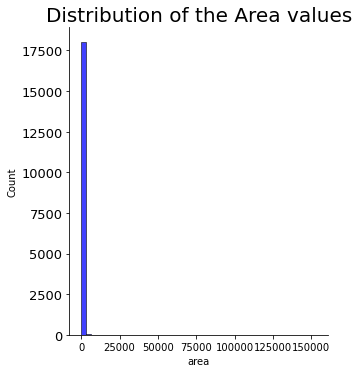

In [44]:
# plot the distribution of the area variable
plt.figure(figsize=(15,10))
sns.displot(X['area'], kde=False, bins=50, color='blue')
plt.title('Distribution of the Area values', fontsize=20);

The distribution of the area variable is heavily right skewed, so we will use log transformation to make it more normal

In [45]:
# take the log of the area variable
area_log = np.log(X['area'])

<Figure size 1080x720 with 0 Axes>

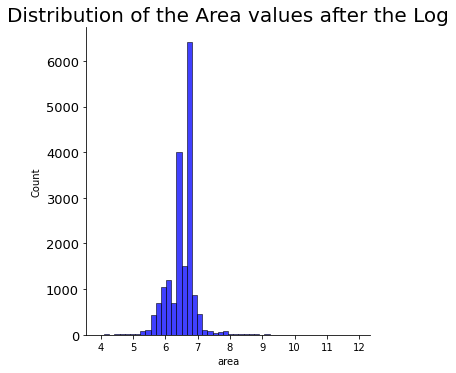

In [46]:
# plot the distribution of the area variable after the log
plt.figure(figsize=(15,10))
sns.displot(area_log, kde=False, bins=50, color='blue')
plt.title('Distribution of the Area values after the Log', fontsize=20);

In [47]:
# replace the area variable with the log of the area variable
X['area'] = area_log

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [49]:
# scale the data
area_scaler = MinMaxScaler(feature_range=(0.1, 1))
meter_price_scaler = MinMaxScaler(feature_range=(0.1, 1))
X_train['area'] = area_scaler.fit_transform(X_train['area'].values.reshape(-1, 1))
y_train = meter_price_scaler.fit_transform(y_train.values.reshape(-1, 1))
X_test['area'] = area_scaler.transform(X_test['area'].values.reshape(-1, 1))
y_test = meter_price_scaler.transform(y_test.values.reshape(-1, 1))

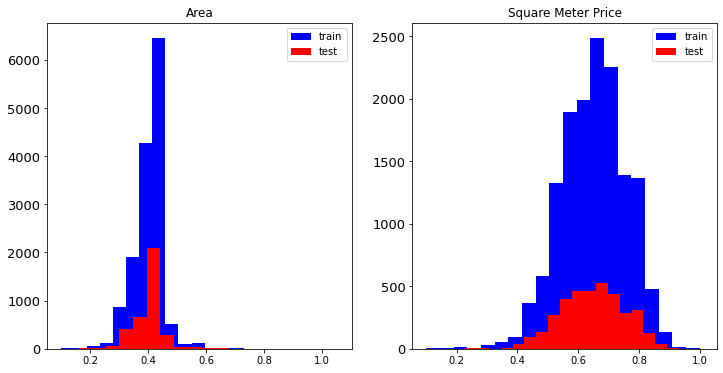

In [50]:
# plot the distribution of the area and square_meter_price for both the train and test data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(X_train['area'], bins=20, color='blue', label='train')
plt.hist(X_test['area'], bins=20, color='red', label='test')
plt.legend()
plt.title('Area')
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=20, color='blue', label='train')
plt.hist(y_test, bins=20, color='red', label='test')
plt.legend()
plt.title('Square Meter Price')
plt.show()

In [51]:
# use ravel on the y_train and y_tes
y_train = y_train.ravel()
y_test = y_test.ravel()

# Modeling

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
# Try all the regression models and see which one is the best using the R2 score, mean absolute error and mean squared error
results = dict()
for model in [Lasso(), ElasticNet(), SGDRegressor(), BayesianRidge(), LinearRegression(), Ridge(), XGBRegressor(objective='reg:squarederror'), SVR()]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # store the mean absolute error and mean squared error for each model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[model.__class__.__name__] = {'mae': mae, 'mse': mse, 'r2': r2, 'rmse': rmse}

In [54]:
# display the results
results

{'Lasso': {'mae': 0.08540320020431229,
  'mse': 0.011107016098487145,
  'r2': -0.00036274383522094666,
  'rmse': 0.10538982919849119},
 'ElasticNet': {'mae': 0.08540320020431229,
  'mse': 0.011107016098487145,
  'r2': -0.00036274383522094666,
  'rmse': 0.10538982919849119},
 'SGDRegressor': {'mae': 0.04297602010511523,
  'mse': 0.004268045034763406,
  'r2': 0.6155949353157271,
  'rmse': 0.0653302765550813},
 'BayesianRidge': {'mae': 0.031105409799724103,
  'mse': 0.002490200069771787,
  'r2': 0.7757180369230878,
  'rmse': 0.04990190447038857},
 'LinearRegression': {'mae': 1933478.2749859113,
  'mse': 701555606245890.2,
  'r2': -6.318619555370162e+16,
  'rmse': 26486894.990653213},
 'Ridge': {'mae': 0.03110303660323527,
  'mse': 0.00248879175347921,
  'r2': 0.7758448781141095,
  'rmse': 0.04988779162760374},
 'XGBRegressor': {'mae': 0.030424628719076984,
  'mse': 0.002429215767486259,
  'r2': 0.7812106393848359,
  'rmse': 0.04928707505509187},
 'SVR': {'mae': 0.046325961151984826,
  'ms

# Calculate the total price from the output of the model

The target is the price per square meter. The total price is the price per square meter times the area.

In [55]:
model = XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train);

In [56]:
# take the first row with columns names
row = pd.DataFrame(X_test.iloc[0]).T
y_pred = model.predict(row)

In [57]:
y_pred

array([0.57546383], dtype=float32)

In [58]:
# calculate the total price from the output of the model
# We use the inverse of the min max scaler to get the original log value of the area and the square meter price
# We use np.exp to inverse the log transformation of the target variable
predicted_price = np.exp(meter_price_scaler.inverse_transform(y_pred[0].reshape(-1, 1))) * np.exp(area_scaler.inverse_transform(row['area'].values[0].reshape(-1, 1)))

In [59]:
predicted_price = predicted_price[0][0]

In [60]:
print('Predicted Price: {:,.0f}'.format(predicted_price))

Predicted Price: 346,162


# Manual inputs to the model

In [61]:
# manually input the features
neighborhood = 'ابحر الشمالية'
block = '182/ ج/ س'
area = 500
year = 2021
month = 1
day = 1

In [62]:
p_year = year - 2021
# log then transform the area
p_area = np.log(area)
p_area = area_scaler.transform(p_area.reshape(-1, 1))[0][0]

neighborhood_index = neighborhood_dict[neighborhood]
block_index = block_dict[block]

input_data = {
    f'neighborhood_{neighborhood_index}': 1,
    f'block_{block_index}': 1,
    'area': p_area,
    'year': p_year,
    'month': month,
    'day': day
}

for col in X_train.columns:
    if col not in input_data:
        input_data[col] = 0

input_data

{'neighborhood_12': 1,
 'block_95': 1,
 'area': 0.37061433189069615,
 'year': 0,
 'month': 1,
 'day': 1,
 'neighborhood_0': 0,
 'neighborhood_1': 0,
 'neighborhood_2': 0,
 'neighborhood_3': 0,
 'neighborhood_4': 0,
 'neighborhood_5': 0,
 'neighborhood_6': 0,
 'neighborhood_7': 0,
 'neighborhood_8': 0,
 'neighborhood_9': 0,
 'neighborhood_10': 0,
 'neighborhood_11': 0,
 'neighborhood_13': 0,
 'neighborhood_14': 0,
 'neighborhood_15': 0,
 'neighborhood_16': 0,
 'neighborhood_17': 0,
 'neighborhood_18': 0,
 'neighborhood_19': 0,
 'neighborhood_20': 0,
 'neighborhood_21': 0,
 'neighborhood_22': 0,
 'neighborhood_23': 0,
 'neighborhood_24': 0,
 'neighborhood_25': 0,
 'neighborhood_26': 0,
 'neighborhood_27': 0,
 'neighborhood_28': 0,
 'neighborhood_29': 0,
 'neighborhood_30': 0,
 'neighborhood_31': 0,
 'neighborhood_32': 0,
 'neighborhood_33': 0,
 'neighborhood_34': 0,
 'neighborhood_35': 0,
 'neighborhood_36': 0,
 'neighborhood_37': 0,
 'neighborhood_38': 0,
 'neighborhood_39': 0,
 'neighb

In [63]:
df_input = pd.DataFrame(input_data, index=[0], columns=X_train.columns)

In [64]:
df_input

,area,year,month,day,neighborhood_0,neighborhood_1,neighborhood_2,neighborhood_3,neighborhood_4,neighborhood_5,...,block_587,block_588,block_589,block_590,block_591,block_592,block_593,block_594,block_595,block_596
0,0.370614,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y_pred = model.predict(df_input)

In [66]:
y_pred

array([0.73322004], dtype=float32)

In [67]:
y_actual = np.exp(meter_price_scaler.inverse_transform(y_pred[0].reshape(-1, 1))) * area

In [68]:
print('Predicted Price: {:,.0f}'.format(y_actual[0][0]))

Predicted Price: 968,950


# Saving Model

save the best-performed model, area_scaler, meter_price_scaler, neighborhood_dict, block_dict, and X_train. 
Also save the neighborhood and block to make a list in the streamlit 

In [69]:
#dump for the best model
from joblib import dump, load
dump(model, 'model.joblib') 

['model.joblib']

In [70]:
dump(area_scaler, 'area_scaler1.joblib') 

['area_scaler1.joblib']

In [71]:
dump(meter_price_scaler, 'meter_price_scaler.joblib') 

['meter_price_scaler.joblib']

In [72]:
dump(neighborhood_dict, 'neighborhood_dict.joblib') 

['neighborhood_dict.joblib']

In [73]:
dump(block_dict, 'block_dict.joblib') 

['block_dict.joblib']

In [74]:
dump(X_train.columns, 'columns.joblib')

['columns.joblib']

<hr>

# Store the neighborhoods with their blocks in a dictionary

In [81]:
neighborhood_dict = {}
for neighborhood in Land_prices_clean['neighborhood'].unique():
    neighborhood_dict[neighborhood] = Land_prices_clean[Land_prices_clean['neighborhood'] == neighborhood]['block'].unique().to_list()

In [82]:
for key, value in neighborhood_dict.items():
    print('neighborhood = ', key)
    print('blocks = ', value)
    print('========================')

neighborhood =  أبحر الجنوبية
blocks =  ['162/ ج/ س', '216/ ب', '216/ ب/ المعدل', 'ابحر الجنوبية', '162/ ج/ س/ المع…', 'ابحر الجنوبية ا…', 'أخرى', '34/ ج/ س', '964/ س/ ت', '396/ س/ ت', '263/ ج/ س']
neighborhood =  أم حبلين
blocks =  ['421/ ج/ س', 'أخرى']
neighborhood =  أم سدرة
blocks =  ['412/ ج/ س']
neighborhood =  ابحر الجنوبية الش…
blocks =  ['أخرى', '109/ ج/ س', 'ابحر الجنوبية ا…']
neighborhood =  ابحر الشمالية
blocks =  ['125/ ج/ س', '182/ ج/ س', '183/ ج/ س', '230/ ب', '231/ ب/ المعدل', '308/ ب/ 1402', '440/ ب', '534/ س/ ت', '1097/ س/ ت', '286/ ب', '440/ ب/ 1405', '440/ ب/ المعدل', '302/ ج/ س', '182/ ج/ س/ المع…', '403/ ب/ 1403', '760/ س/ ت', 'أخرى']
neighborhood =  الأجواد
blocks =  ['223/ ب/ المعدل', 'أخرى']
neighborhood =  الأمير عبد المجيد
blocks =  ['258/ ج/ س', '258/ ج/ س/ المع…']
neighborhood =  الاجاويد
blocks =  ['295/ ب', '323/ ب', '397/ ج/ س', '295/ ب/ المعدل']
neighborhood =  الاجواد
blocks =  ['223/ ب', '353/ ج/ س', '373/ ج/ س', '123/ ج/ س', 'أخرى']
neighborhood =  ا

In [83]:
dump(neighborhood_dict, 'neighborhood_dict2.joblib')

['neighborhood_dict2.joblib']

In [84]:
neighborhood_dict

{'أبحر الجنوبية': ['162/ ج/ س',
  '216/ ب',
  '216/ ب/ المعدل',
  'ابحر الجنوبية',
  '162/ ج/ س/ المع…',
  'ابحر الجنوبية ا…',
  'أخرى',
  '34/ ج/ س',
  '964/ س/ ت',
  '396/ س/ ت',
  '263/ ج/ س'],
 'أم حبلين': ['421/ ج/ س', 'أخرى'],
 'أم سدرة': ['412/ ج/ س'],
 'ابحر الجنوبية الش…': ['أخرى', '109/ ج/ س', 'ابحر الجنوبية ا…'],
 'ابحر الشمالية': ['125/ ج/ س',
  '182/ ج/ س',
  '183/ ج/ س',
  '230/ ب',
  '231/ ب/ المعدل',
  '308/ ب/ 1402',
  '440/ ب',
  '534/ س/ ت',
  '1097/ س/ ت',
  '286/ ب',
  '440/ ب/ 1405',
  '440/ ب/ المعدل',
  '302/ ج/ س',
  '182/ ج/ س/ المع…',
  '403/ ب/ 1403',
  '760/ س/ ت',
  'أخرى'],
 'الأجواد': ['223/ ب/ المعدل', 'أخرى'],
 'الأمير عبد المجيد': ['258/ ج/ س', '258/ ج/ س/ المع…'],
 'الاجاويد': ['295/ ب', '323/ ب', '397/ ج/ س', '295/ ب/ المعدل'],
 'الاجواد': ['223/ ب', '353/ ج/ س', '373/ ج/ س', '123/ ج/ س', 'أخرى'],
 'الاصالة': ['372/ ب'],
 'الامواج': ['251/ ب',
  '420/ ج/ س',
  '90/ ب/ 99',
  '251/ ب/ المعدل',
  '403/ ب/ 1403',
  '179/ ج/ س',
  '220/ ج/ س'],
 'الامير